In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Examining the "TRANSACTION DATA"

# Check list:

##  Identifying rows and columns:
- This dataset contains 264836 observations and 8 variables

## Identifying data types: 
- 7 quantitative variables (float64 + int64) 
- 1 qualitative variable (Object)

## Checking the missing values :
- No messing values : 264836 /264836 values --> 0 nan values

In [3]:
#read transaction_data
data1= pd.read_excel("QVI_transaction_data.xlsx")
data1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df1=data1.copy()
print(f' this dataset contains {df1.shape[0]} observations and {df1.shape[1]} features')

 this dataset contains 264836 observations and 8 features


In [5]:
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [6]:
df1.dtypes.value_counts()#.plot.pie() 

int64      6
object     1
float64    1
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=True)

DATE              0.0
STORE_NBR         0.0
LYLTY_CARD_NBR    0.0
TXN_ID            0.0
PROD_NBR          0.0
PROD_NAME         0.0
PROD_QTY          0.0
TOT_SALES         0.0
dtype: float64

# Examining the "CUSTOMER DATA" 

# Check list:

##  Identifying rows and columns:
- This dataset contains 72637 rows and 3 columns

## Identifying data types: 
- 1 quantitative variables (int64) 
- 2 qualitative variable (Object)

## Checking the missing values :
- No messing values : 72637 /72637 values --> 0 nan values

In [9]:
data2= pd.read_csv("QVI_purchase_behaviour.csv")
data2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [10]:
df2=data2.copy()
print(f' this dataset contains {df2.shape[0]} observations and {df2.shape[1]} features')

 this dataset contains 72637 observations and 3 features


In [11]:
df2.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [12]:
df2.dtypes.value_counts()

object    2
int64     1
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
(df2.isna().sum()/df2.shape[0]).sort_values(ascending=True)

LYLTY_CARD_NBR      0.0
LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64

# Merge the transaction and customer data together 

In [15]:
df_=df1.merge(df2)
df_.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,YOUNG SINGLES/COUPLES,Premium


In [16]:
df_.shape

(264836, 10)

# Data analysis and customer segments

# Check list:
## Visualize quantitative variables:
- Date, STORE_NBR,LYLTY_CARD_NBR,TXN_ID ,PROD_NBR,PROD_QTY,TOT_SALES show an asymmetric distributions.
- Date has incorrect data format (int64), we suppose that:
    - DATE may be represent days in year : 
        - len(df_['DATE'].unique())=364 --> missing data 
    - Date may be represent list transactions by date --> we convert it to the date format
        -first date    2018-07-01 
        -last date    2019-06-30
    
- LYLTY_CARD_NBR and TXN_ID have the same distribution, we choose to work with only LYLTY_CARD_NBR column.
- STORE_NBR may be dropped
- We can create a dictionary that associate {PROD_NBR:PROD_NAME}
- PROD_QTY: - most customers buy 2 chips (PROD_QTY.quantile.75==2) 
            - only one customer with 'LYLTY_CARD_NBR'==226000 had two transactions over the year, we can remove this customer.

## Visualize qualitative Analysis: 

- PREMIUM_CUSTOMER: 3 catgories (Mainstream =39%, budget=35%, premium=26%)
- LIFESTAGE :7 categories.
    - we can create a new column called "GROUP" that groups this categories:
    - between [18-21]% : RETIREES, OLDER SINGLES/COUPLES, OLDER FAMILIES 
    - between [14-16]% :  YOUNG SINGLES/COUPLES, YOUNG FAMILIES
    - MIDAGE SINGLES/COUPLES 9%
    - NEW FAMILIES 3%
    
- PROD_NAME: - we have 114 elements of PROD_NAME.
             - Visualising and analyzing  the 50 most frequent words in PROD_NAME : 
                 - the words: ('salsa', 18094), ('old', 9324),('el', 9324),
                    ('paso', 9324), ('dip', 9324), ('tomato', 7669) dont refer to chips
                 - we remove all transactions that contain Product_name== salsa
                 - Adding new features like BRAND to look what chip brand sells the most? we can see that KETTLE is the most                     popular chip brand buy by customers. We can deepen our analysis to see which chip brand sells the most by                       customer's type??
                 - Adding new features like P_SIZE, we notice that the smallest package is 70 g and the largest is                               380 g. The best-selling packages are 175g in size but we can deepen the analysis and see which package  
                  size is most purchased by customer's profile??
    
## Visualize correlations between differents variables:
- By analyzing the total sales over time [2018-07-01: 2019-06-30]:
        - we notice that the total sales are low in the months of August (20/08/2018) and May (18/5/2019);
        - we also notice that the total sales increase in December before Christmas and equals 0 on Christmas Day due to shops closures.
- Proportion of Customers/number of transactions: 
    - We note that maximum number of transactions is done by Mainstream OLDER SINGLES/COUPLES, Mainstream RETIREES and Budjet OLDER FAMILIES.
- Proportion of Customers/ sales:
    -  We note that higher sales are coming from Mainstream OLDER SINGLES/COUPLES, Mainstream RETIREES and Budjet OLDER FAMILIES.
    
- Average quantity per unit by LIFESTAGE and PREMIUM_CUSTOMER  : 
    - OLDER FAMILIES and YOUNG FAMILIES buy more quantity of chips per customer.
    
- Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER  :
    - Mainstream YOUNG SINGLES/COUPLES and Mainstream MIDAGE SINGLES/COUPLES pay more to buy the chips but the difference in average price per unit isn’t large.
    
- T-Test:
    - Hypothesis H0:  Average price per unit are equal in Mainstream YOUNG/MIDAGE (SINGLES/COUPLES) and no Mainstream YOUNG/MIDAGE (SINGLES/COUPLES).
        H0-->rejected -->Average price per unit for Mainstream YOUNG/MIDAGE (SINGLES/COUPLES) are significantly higher than that of Budget/Premium YOUNG/MIDAGE (SINGLES/COUPLES).
        
-  To further increase sales, we can  target customer segments Mainstream - young singles/couples that contribute the most to sales and retain them. We try to find their tend to buy a particular brand of chips.  

- Focus on the Mainstream Young Singles/Couples segment:
   - Sorting by TARGET_SEGMENT/Brand customer segment is more likely to purchase Doritos chips compared to the rest of the population.
   - By affinity to Brand, Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population.
   - Sorting by TARGET_SEGMENT/Pack, the 175g and 150g packs are the most purchased by the customer segment.
   - By affinity to pack:  27% more likely to purchase a 270g pack of chips compared to rest of clients.
   - Twisties are the only brand offering 270g packs
   

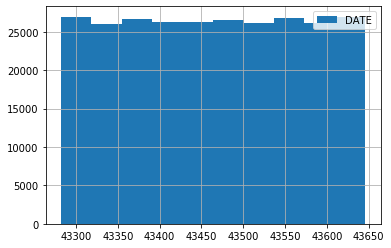

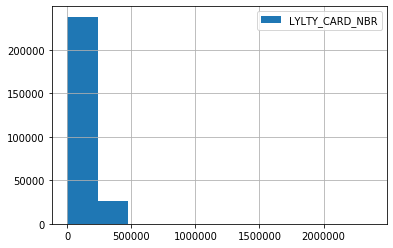

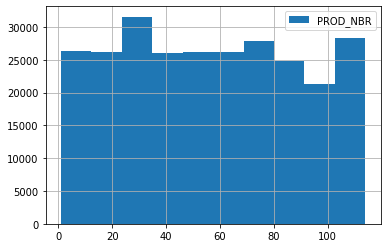

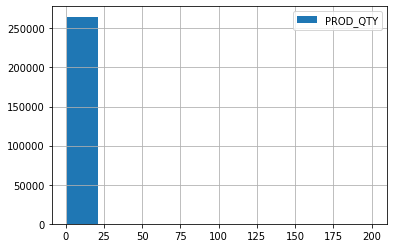

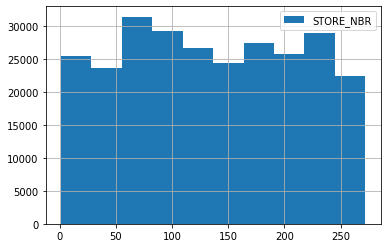

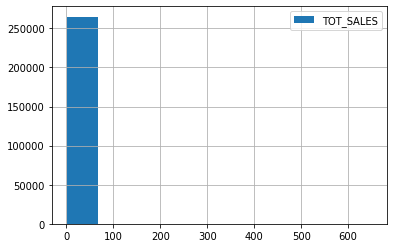

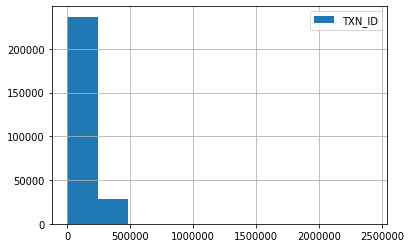

In [17]:
for col in (df_.select_dtypes('int64')|df_.select_dtypes('float')):
    plt.figure()
    df_[col].hist(label=col)
    plt.legend()
                                            

In [18]:
from datetime import datetime
df_['DATE']=df_['DATE'].apply(lambda x: datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x- 2)) # origin =1899‐12‐30


In [19]:
df_.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


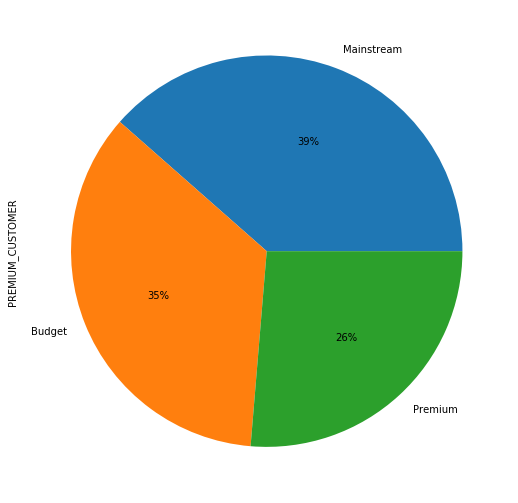

In [20]:
plt.figure(figsize=(9,9))
df_['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(df_['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending=False).index))
plt.show()

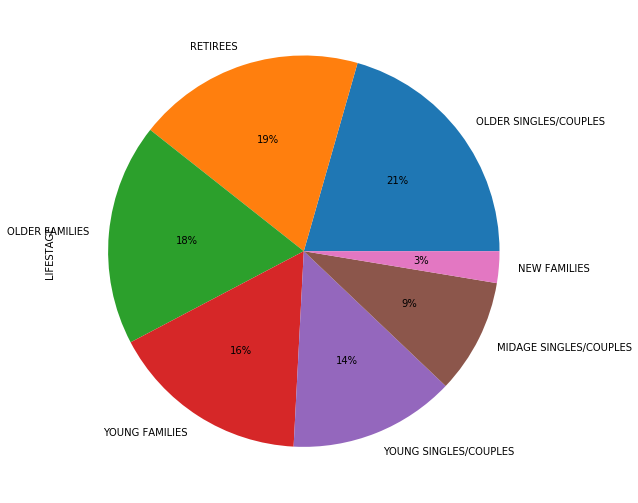

In [21]:
plt.figure(figsize=(9,9))
df_['LIFESTAGE'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(df_['LIFESTAGE'].value_counts().sort_values(ascending=False).index))
plt.show()

In [22]:
df_['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [23]:
df_['PROD_NAME'].value_counts(normalize=True)

Kettle Mozzarella   Basil & Pesto 175g      0.012476
Kettle Tortilla ChpsHny&Jlpno Chili 150g    0.012445
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    0.012343
Tyrrells Crisps     Ched & Chives 165g      0.012340
Cobs Popd Sea Salt  Chips 110g              0.012328
                                              ...   
RRD Pc Sea Salt     165g                    0.005403
Woolworths Medium   Salsa 300g              0.005400
NCC Sour Cream &    Garden Chives 175g      0.005358
French Fries Potato Chips 175g              0.005354
WW Crinkle Cut      Original 175g           0.005324
Name: PROD_NAME, Length: 114, dtype: float64

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from textblob import Word


In [25]:
#indexing with nltk
stop_words = set(stopwords.words('english'))
def identify_tokens(df_):
    word_tokens = word_tokenize(df_['PROD_NAME']) 
    #Delete ponctuation
    word_tokens=[word.lower() for word in word_tokens if word.isalpha()]
    #Delete stop words
    word_tokens_ = [w for w in word_tokens if not w in stop_words] 
    lem1= [Word(w).lemmatize("n") for w in word_tokens_] 
    lem2= [Word(w).lemmatize("v") for w in lem1] 
    lem3= [Word(w).lemmatize("n") for w in lem2]  
    return lem3

In [26]:
df_['words']= df_.apply(identify_tokens, axis=1) 
df_.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,"[natural, chip, compny]"
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,"[cc, nacho, cheese]"
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,"[ww, original, stack, chip]"
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,"[cc, original]"
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,"[smith, crinkle, cut, chip, chicken]"


In [27]:
df_['words']= df_['words'].astype('str') 
df_['words']= df_['words'].str.replace("[", "") 
df_['words']= df_['words'].str.replace("]", "") 
df_['words']= df_['words'].str.replace(",", " ")
df_['words']= df_['words'].str.replace("'", "") 
df_.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer().fit(df_.words)
bag_of_words = vec.transform(df_.words)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)

[('chip', 68415),
 ('kettle', 41288),
 ('salt', 34224),
 ('smith', 31823),
 ('cheese', 27890),
 ('pringles', 25102),
 ('doritos', 24962),
 ('crinkle', 23960),
 ('corn', 22063),
 ('original', 21560),
 ('cut', 20754),
 ('salsa', 18094),
 ('chicken', 15407),
 ('chilli', 15390),
 ('sea', 14145),
 ('thin', 14075),
 ('sour', 13882),
 ('crisp', 12607),
 ('vinegar', 12402),
 ('rrd', 11894),
 ('sweet', 11060),
 ('infuzions', 11057),
 ('supreme', 10963),
 ('chive', 10951),
 ('cream', 10723),
 ('ww', 10320),
 ('cob', 9693),
 ('popd', 9693),
 ('tortilla', 9580),
 ('tostitos', 9471),
 ('twisties', 9454),
 ('bbq', 9434),
 ('sensation', 9429),
 ('lime', 9347),
 ('old', 9324),
 ('el', 9324),
 ('paso', 9324),
 ('dip', 9324),
 ('tomato', 7669),
 ('thinly', 7507),
 ('tyrrells', 6442),
 ('tangy', 6332),
 ('sourcream', 6296),
 ('grain', 6272),
 ('wave', 6272),
 ('lightly', 6248),
 ('soy', 6121),
 ('natural', 6050),
 ('mild', 6048),
 ('red', 5885),
 ('rock', 5885),
 ('deli', 5885),
 ('thai', 4737),
 ('burge

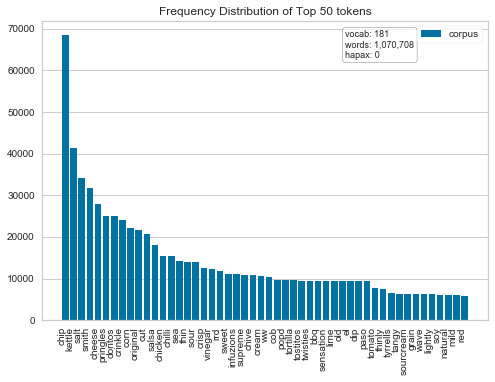

In [30]:
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
prods      = vectorizer.fit_transform(df_.words)
 
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(prods)
visualizer.show()

In [31]:
df=df_[df_['PROD_NAME'].str.contains('Salsa') == False]

In [32]:
df.shape

(246742, 11)

In [33]:
df['PROD_QTY'].describe() 

count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [34]:
df[df['PROD_QTY']>=6]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,dorito corn chp supreme
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,dorito corn chp supreme


In [35]:
df=df[df['LYLTY_CARD_NBR']!=226000]

In [36]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [37]:
#adding new features
#Brand analysis
def Product_Brand(grp):
    return grp["words"].split()[0] #PROD_NAME
df["BRAND"] = df.apply(Product_Brand,axis=1)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny,natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese,cc
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip,ww
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original,cc
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken,smith


In [38]:
df["BRAND"].value_counts()

kettle       41288
smith        30353
pringles     25102
doritos      22041
thin         14075
rrd          11894
infuzions    11057
ww           10320
cob           9693
tostitos      9471
twisties      9454
tyrrells      6442
grain         6272
natural       6050
cheezels      4603
cc            4551
red           4427
dorito        3183
infzns        3144
cheetos       2927
snbts         1576
burger        1564
woolworth     1516
grnwves       1468
sunbites      1432
ncc           1419
french        1418
Name: BRAND, dtype: int64

In [39]:
# Clean brand names
d = {'red':'RRD','ww':'WOOLWORTHS','ncc':'NATURAL','snbts':'SUNBITES','infzns':'INFUZIONS','smith':'SMITHS','dorito':'DORITOS','grain':'GRNWVES'}
df['BRAND'] = df['BRAND'].str.lower().replace(d).str.upper()
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese,CC
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip,WOOLWORTHS
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original,CC
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken,SMITHS


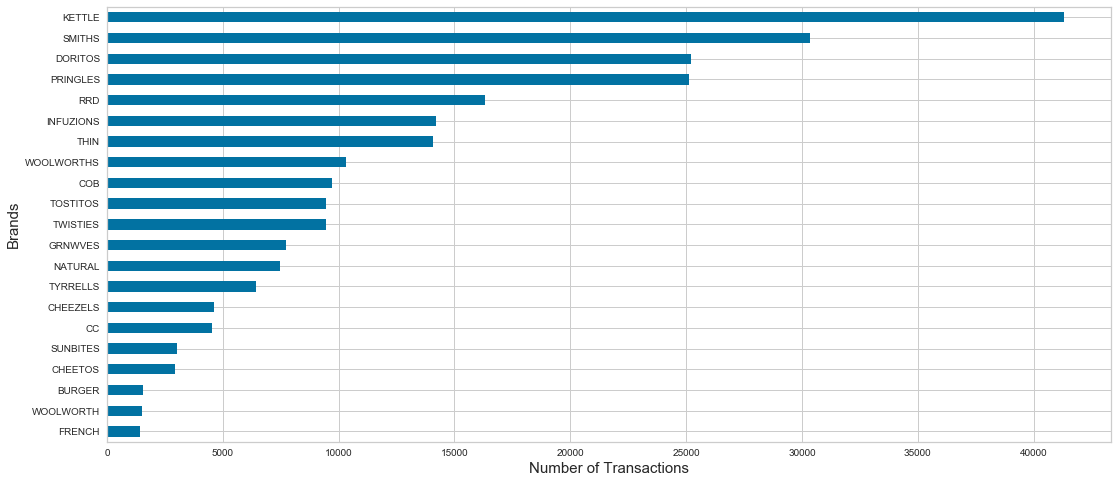

In [40]:
plt.xlabel('Number of Transactions',{'fontsize':15})
plt.ylabel('Brands',{'fontsize':15})
df.BRAND.value_counts().sort_values().plot(kind='barh',figsize=(18,8))

In [41]:
#adding new features
#Pack_size analysis
df["P_SIZE"]=df["PROD_NAME"].apply(lambda x: ''.join([i for i in x if i.isdigit()]))
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words,BRAND,P_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny,NATURAL,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese,CC,175
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip,WOOLWORTHS,160
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original,CC,175
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken,SMITHS,170


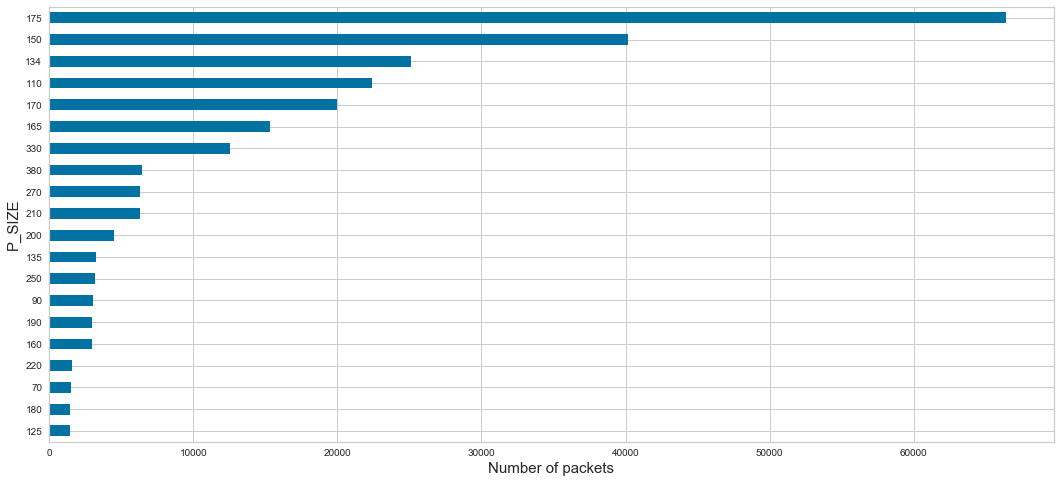

In [42]:
plt.xlabel('Number of packets',{'fontsize':15})
plt.ylabel('P_SIZE',{'fontsize':15})
df.P_SIZE.value_counts().sort_values().plot(kind='barh',figsize=(18,8))

In [43]:
df['DATE'].describe()

count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

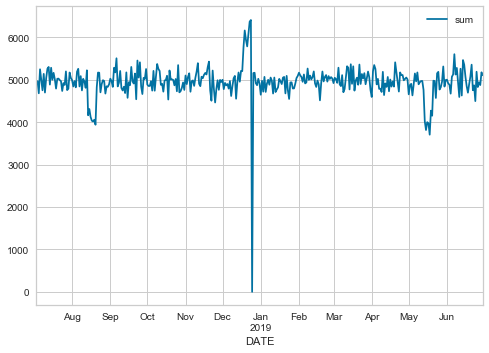

In [44]:
df_temp=df.copy()
df_temp.index = pd.to_datetime(df_temp['DATE'])
df_temp.loc["2018-07-03":"2019-07-02",'TOT_SALES'].resample('D').agg(['sum']).plot()

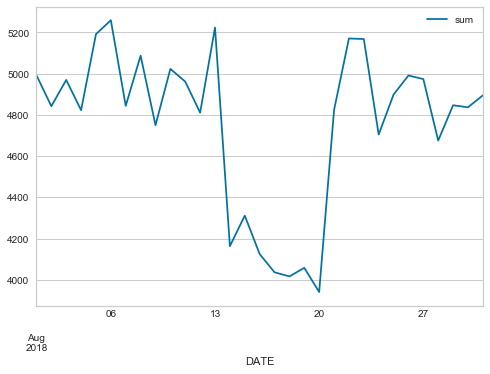

In [45]:
df_temp.loc["2018-08",'TOT_SALES'].resample('D').agg(['sum']).plot() #total des ventes <4000 20/8/2018

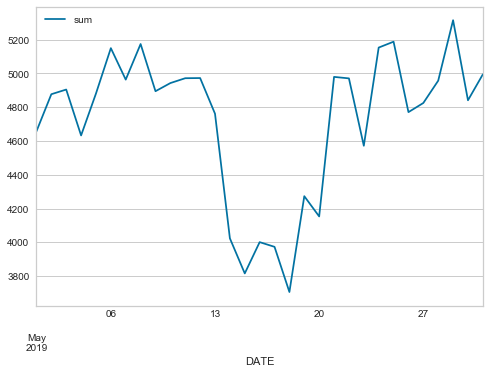

In [46]:

df_temp.loc["2019-05",'TOT_SALES'].resample('D').agg(['sum']).plot()


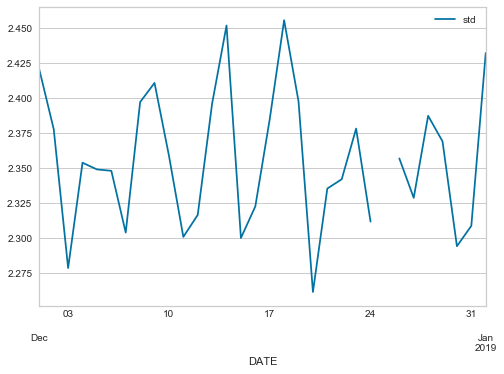

In [47]:
df_temp.loc["2018-12":"2019-1-1",'TOT_SALES'].resample('D').agg(['std']).plot()

In [48]:
df_temp.loc["2018-12",'TOT_SALES'].resample('D').agg(['mean','std','sum'])

,mean,std,sum
DATE,,,
2018-12-01,7.408741,2.420455,5000.9
2018-12-02,7.299389,2.377860,4781.1
2018-12-03,7.277696,2.278428,4927.0
2018-12-04,7.311411,2.353827,4869.4
2018-12-05,7.425000,2.349028,4900.5
2018-12-06,7.430853,2.348039,4792.9
2018-12-07,7.398363,2.303832,4971.7
2018-12-08,7.425080,2.397237,4618.4
2018-12-09,7.351745,2.410925,4844.8


In [71]:
#visualize correlations between features
df_group = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'PROD_QTY':'sum','TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique'}).reset_index()
df_group

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,8883,33345.70,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,84734.25,3298
2,MIDAGE SINGLES/COUPLES,Premium,14400,54443.85,2369
3,NEW FAMILIES,Budget,5241,20607.45,1087
4,NEW FAMILIES,Mainstream,4060,15979.70,830
5,NEW FAMILIES,Premium,2769,10760.80,575
6,OLDER FAMILIES,Budget,41853,156863.75,4611
7,OLDER FAMILIES,Mainstream,25804,96413.55,2788
8,OLDER FAMILIES,Premium,20239,75242.60,2231
9,OLDER SINGLES/COUPLES,Budget,32883,127833.60,4849


In [72]:
# Visualize correlation between Proportion of Customers/number of transactions
import plotly.express as px
fig = px.bar(df_group,df_group['LIFESTAGE'],df_group['LYLTY_CARD_NBR'],df_group['PREMIUM_CUSTOMER'],text=df_group['LYLTY_CARD_NBR'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Proportion of Customers',title_x=0.5)
fig.show()

In [73]:
# Visualize correlation between Proportion of Customers/ total sales
fig = px.bar(df_group,df_group['LIFESTAGE'],df_group['TOT_SALES'],df_group['PREMIUM_CUSTOMER'],text=df_group['TOT_SALES'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Proportion of Sales',title_x=0.5)
fig.show()

In [74]:
#Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER correlation 
# new feature average price per unit chips
df_group['Average_price']=df_group['TOT_SALES']/df_group['PROD_QTY']
fig = px.bar(df_group,df_group['LIFESTAGE'],df_group['Average_price'],df_group['PREMIUM_CUSTOMER'],text=df_group['Average_price'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='average chip price by customer segment',title_x=0.5)
fig.show()


In [75]:
#Number of products sold on average per transaction
# new feature average quantity per unit chips
df_group['Average_qty']=df_group['PROD_QTY']/df_group['LYLTY_CARD_NBR']
fig = px.bar(df_group,df_group['LIFESTAGE'],df_group['Average_qty'],df_group['PREMIUM_CUSTOMER'],text=df_group['Average_qty'])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='average quantity by customer segment',title_x=0.5)
fig.show()


In [76]:
#use T-test 
from scipy.stats import ttest_ind
df['Average_price']=df['TOT_SALES']/df['PROD_QTY']
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,words,BRAND,P_SIZE,Average_price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,natural chip compny,NATURAL,175,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,cc nacho cheese,CC,175,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,ww original stack chip,WOOLWORTHS,160,1.90
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,cc original,CC,175,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,smith crinkle cut chip chicken,SMITHS,170,1.45


In [90]:
#create Mainstream and no Mainstream segments
df_Mainstream=df[((df['LIFESTAGE'] =="YOUNG SINGLES/COUPLES")|(df['LIFESTAGE'] =="MIDAGE SINGLES/COUPLES")) &(df['PREMIUM_CUSTOMER'] =="Mainstream")] 
df_no_Mainstream=df[((df['LIFESTAGE'] =="YOUNG SINGLES/COUPLES")|(df['LIFESTAGE'] =="MIDAGE SINGLES/COUPLES")) &(df['PREMIUM_CUSTOMER'] !="Mainstream")] 

In [88]:
df_no_Mainstream.shape

(26728, 14)

In [91]:
df_Mainstream.shape

(30639, 14)

In [96]:
balanced_df_Mainstream=df_Mainstream.sample(df_no_Mainstream.shape[0])
def t_test(col):
    alpha =0.02
    stat,p=ttest_ind(df_no_Mainstream[col],balanced_df_Mainstream[col])
    if p<alpha:
        return 'H0 rejected'
    else:
        return 0


In [97]:
print(t_test('Average_price'))

H0 rejected


In [173]:
#create Mainstream YOUNG SINGLES/COUPLES and no Mainstream YOUNG SINGLES/COUPLES
df_young=df[(df['LIFESTAGE'] =="YOUNG SINGLES/COUPLES") &(df['PREMIUM_CUSTOMER'] =="Mainstream")] 
df_no_young=df[(df['LIFESTAGE'] !="YOUNG SINGLES/COUPLES") &(df['PREMIUM_CUSTOMER'] !="Mainstream")] 

In [174]:
quantity_segment = df_young.groupby(['BRAND'])[['PROD_QTY']].sum().reset_index().set_index("BRAND")
quantity_other =df_no_young.groupby(['BRAND'])[['PROD_QTY']].sum().reset_index().set_index("BRAND")

In [175]:
quantity_young_by_brand=quantity_segment.PROD_QTY / quantity_segment .PROD_QTY.sum()
quantity_young_by_brand.name = "TARGET_SEGMENT"

In [176]:
quantity_no_young_by_brand = quantity_other.PROD_QTY / quantity_other.PROD_QTY.sum()
quantity_no_young_by_brand.name = "OTHER_SEGMENT"

In [206]:
CONCAT_BRAND = pd.concat([quantity_young_by_brand,quantity_no_young_by_brand], names=["TARGET_SEGMENT","OTHER_SEGMENT"],axis=1)
CONCAT_BRAND["AFFINITY_TO_BRAND"] = (CONCAT_BRAND["TARGET_SEGMENT"] / CONCAT_BRAND["OTHER_SEGMENT"])
CONCAT_BRAND = CONCAT_BRAND.sort_values(by = "TARGET_SEGMENT", ascending = False)
CONCAT_BRAND

,TARGET_SEGMENT,OTHER_SEGMENT,AFFINITY_TO_BRAND
BRAND,,,
KETTLE,0.197985,0.166560,1.188667
DORITOS,0.122761,0.101171,1.213397
PRINGLES,0.119420,0.101110,1.181090
SMITHS,0.096370,0.124218,0.775811
INFUZIONS,0.064679,0.057410,1.126622
THIN,0.060373,0.057159,1.056217
TWISTIES,0.046184,0.037933,1.217506
TOSTITOS,0.045411,0.038350,1.184100
COB,0.044638,0.038449,1.160959


In [207]:
CONCAT_BRAND = CONCAT_BRAND.sort_values(by = "AFFINITY_TO_BRAND", ascending = False)
CONCAT_BRAND

,TARGET_SEGMENT,OTHER_SEGMENT,AFFINITY_TO_BRAND
BRAND,,,
TYRRELLS,0.031553,0.025715,1.227025
TWISTIES,0.046184,0.037933,1.217506
DORITOS,0.122761,0.101171,1.213397
KETTLE,0.197985,0.166560,1.188667
TOSTITOS,0.045411,0.038350,1.184100
PRINGLES,0.119420,0.101110,1.181090
COB,0.044638,0.038449,1.160959
INFUZIONS,0.064679,0.057410,1.126622
THIN,0.060373,0.057159,1.056217


In [180]:
#deep into pack size 
quantity_segment_by_pack = df_young.groupby(['P_SIZE'])[['PROD_QTY']].sum().reset_index().set_index("P_SIZE")
quantity_other_by_pack =df_no_young.groupby(['P_SIZE'])[['PROD_QTY']].sum().reset_index().set_index("P_SIZE")

In [181]:
quantity_by_pack_young=quantity_segment_by_pack.PROD_QTY / quantity_segment_by_pack.PROD_QTY.sum()
quantity_by_pack_young.name = "TARGET_SEGMENT"

quantity_by_pack_other= quantity_other_by_pack.PROD_QTY / quantity_other_by_pack.PROD_QTY.sum()
quantity_by_pack_other.name = "OTHER_SEGMENT"

In [185]:
CONCAT_BRAND_by_pack = pd.concat([quantity_by_pack_young,quantity_by_pack_other], names=["TARGET_SEGMENT","OTHER_SEGMENT"],axis=1)
CONCAT_BRAND_by_pack["AFFINITY_TO_PACK"] = (CONCAT_BRAND_by_pack["TARGET_SEGMENT"] / CONCAT_BRAND_by_pack["OTHER_SEGMENT"])
CONCAT_BRAND_by_pack = CONCAT_BRAND_by_pack.sort_values(by = "TARGET_SEGMENT", ascending = False)
CONCAT_BRAND_by_pack

,TARGET_SEGMENT,OTHER_SEGMENT,AFFINITY_TO_PACK
P_SIZE,,,
175,0.254990,0.271458,0.939335
150,0.157598,0.163070,0.966449
134,0.119420,0.101110,1.181090
110,0.106280,0.089575,1.186492
170,0.080773,0.080347,1.005300
330,0.061284,0.050974,1.202243
165,0.055652,0.061587,0.903629
380,0.032160,0.025711,1.250827
270,0.031829,0.025070,1.269608


In [187]:
#affinity to pack
CONCAT_BRAND_by_pack = CONCAT_BRAND_by_pack.sort_values(by = "AFFINITY_TO_PACK", ascending = False)
CONCAT_BRAND_by_pack

,TARGET_SEGMENT,OTHER_SEGMENT,AFFINITY_TO_PACK
P_SIZE,,,
270,0.031829,0.025070,1.269608
380,0.032160,0.025711,1.250827
330,0.061284,0.050974,1.202243
110,0.106280,0.089575,1.186492
134,0.119420,0.101110,1.181090
210,0.029124,0.024891,1.170020
135,0.014769,0.012931,1.142086
250,0.014355,0.012863,1.115959
170,0.080773,0.080347,1.005300


In [205]:
df[df['P_SIZE']=='270']['PROD_NAME'].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

# We can concludes that :
First, the maximum of transactions and sales are made by Mainstream OLDER SINGLES/COUPLES- RETIREES and Budjet OLDER FAMILIES.
Second, OLDER FAMILIES and YOUNG FAMILIES buy in general more quantity of chips per customer.
Third, Mainstream YOUNG SINGLES/COUPLES and  MIDAGE SINGLES/COUPLES pay more to buy the chips.
- Focus on the Mainstream Young Singles/Couples segment:
   - Sorting by TARGET_SEGMENT/Brand customer segment is more likely to purchase Doritos chips compared to the rest of the population.
   - By affinity to Brand, Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population.
   - Sorting by TARGET_SEGMENT/Pack, the 175g and 150g packs are the most purchased by the customer segment.
   - By affinity to pack:  27% more likely to purchase a 270g pack of chips compared to rest of clients.
   - Twisties are the only brand offering 270g packs.
